# Prediction of outflow of bank customers.
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones. We need to predict whether a customer will leave the bank soon.

## Task Statement.
Predict if a customer will leave the bankPredict if a customer will leave the bank.

##  The goal.
- Build a model with the maximum possible F1 score. 
- The F1 score should be at least 0.59. 
- Check the F1 value for the test set.
- Measure the AUC-ROC metric.
- Compare the AUC-ROC metric with the F1 metric.

## Data description.

Data on the behavior of customers and cancellation of contracts with the bank are presented.

https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

<b>Features</b>

- `RowNumber` — data string index
- `CustomerId` — unique customer identifier
- `Surname` — surname
- `CreditScore` — credit score
- `Geography` — country of residence
- `Gender` — gender
- `Age` — age
- `Tenure` — period of maturation for a customer’s fixed deposit (years)
- `Balance` — account balance
- `NumOfProducts` — number of banking products used by the customer
- `HasCrCard` — customer has a credit card
- `IsActiveMember` — customer’s activeness
- `EstimatedSalary` — estimated salary

<b>Target</b>

- `Exited` — сustomer has left

## Overall Plan.

1. Download and prepare the data
2. Download and prepare the data
3. Feature Preparation
4. Examine the balance of classes
5. Fixing class imbalance
6. Build and test the best identified model
7. General conclusion


## Libraries

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import warnings

## Reading and first look at the data.

In [2]:
# to try to open a data file
try:
    data = pd.read_csv('Churn.csv')
except:
    print('Unable to open the file')

In [3]:
# description of the table data
#print(data.describe())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
# calculate the percentage of missing values
data['Tenure'].isna().sum()*100/len(data['Tenure'])

9.09

In [6]:
# the number of unique values in the column 'Geography'
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
# the number of unique values in the column 'Tenure'
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

### Conclusion
The dataset has missing values in the "Tenure" column, they are less than 10%. Three columns have the 'object' data type, these columns must be converted to a numeric data type or dropped it.

## Data Preprocessing

In [8]:
# drop the missing values in the "Tenure" column
data = data.dropna(subset=['Tenure']) 

In [9]:
# replace the 'Geography' column with numeric values. 
data['Geography'] = data['Geography'].replace(['France', 'Germany', 'Spain'], [0, 1, 2])

In [10]:
# Delete the "Surname" column
data = data.drop(['Surname'], axis = 1)
#data = data.drop(['RowNumber','CustomerId'], axis = 1)

In [11]:
# convert categorical features into numerical ones
data_ohe = pd.get_dummies(data,drop_first = True)
print(data_ohe.info())
#data_ohe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   CreditScore      9091 non-null   int64  
 3   Geography        9091 non-null   int64  
 4   Age              9091 non-null   int64  
 5   Tenure           9091 non-null   float64
 6   Balance          9091 non-null   float64
 7   NumOfProducts    9091 non-null   int64  
 8   HasCrCard        9091 non-null   int64  
 9   IsActiveMember   9091 non-null   int64  
 10  EstimatedSalary  9091 non-null   float64
 11  Exited           9091 non-null   int64  
 12  Gender_Male      9091 non-null   uint8  
dtypes: float64(3), int64(9), uint8(1)
memory usage: 932.2 KB
None


### Conclusion
In order not to add many new columns to the dataframe, delete the "Surname" column. Then we will use the One Hot Encoding method to convert categorical features into numeric ones. The OHE method is universal and suitable for most machine learning algorithms without loss of performance.

## Split the source data into a training set, a validation set, and a test set.

In [12]:
# getting a test set, a validation set and a training set.
df_train, df_test = train_test_split(data_ohe, test_size=0.4, random_state=12345) 
df_test, df_valid = train_test_split(df_test,test_size=0.5, random_state=12345)

# declare variables for features and target feature for a training set
features_train = df_train.drop(['Exited'], axis = 1)
target_train = df_train['Exited']

# declare variables for features and target feature for a validation set
features_valid = df_valid.drop(['Exited'], axis = 1)
target_valid = df_valid['Exited']

# declare variables for features and target feature for a testing set
features_test = df_test.drop(['Exited'], axis = 1)
target_test = df_test['Exited']

print('The shape of the training set:',features_train.shape)
print('The shape of the validation set:',features_valid.shape)
print('The shape of the test set:',features_test.shape)


The shape of the training set: (5454, 12)
The shape of the validation set: (1819, 12)
The shape of the test set: (1818, 12)


## Analysis of features

In [13]:
features = ['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

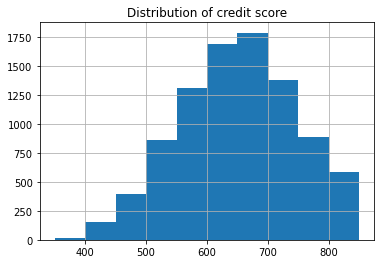

In [14]:
data['CreditScore'].hist()
plt.title('Distribution of credit score')
plt.show()

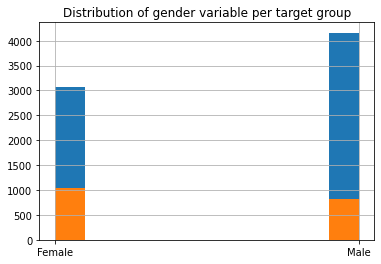

In [15]:
data.groupby('Exited')['Gender'].hist()
plt.title('Distribution of gender variable per target group')
plt.show()

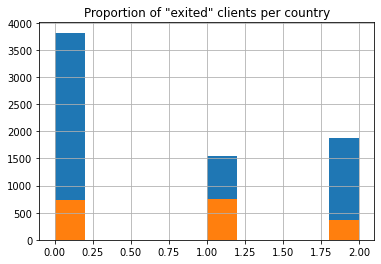

In [16]:
data.groupby('Exited')['Geography'].hist()
plt.title('Proportion of "exited" clients per country')
plt.show()

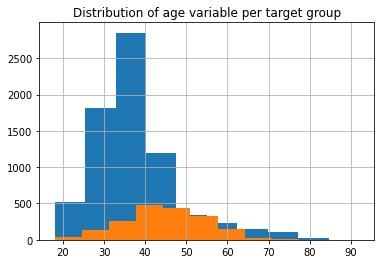

In [17]:
data.groupby('Exited')['Age'].hist()
plt.title('Distribution of age variable per target group')
plt.show()

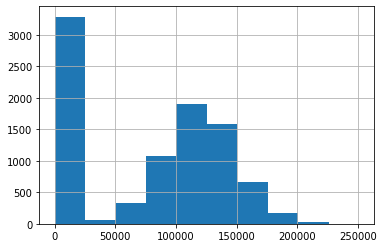

In [38]:
data['Balance'].hist()
plt.show()

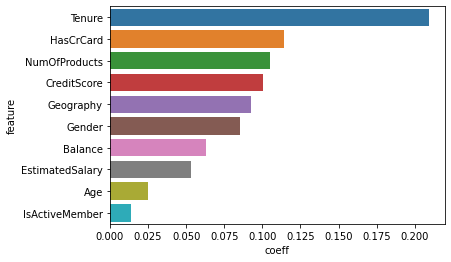

In [19]:
#X, y = data[features].values,data['Exited'].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rfc = DecisionTreeClassifier().fit(features_train, target_train)
y_pred = rfc.predict(features_test)
df_feature_importances = pd.DataFrame(((zip(features, rfc.feature_importances_)))).rename(columns={0:"feature",1:"coeff"}).sort_values(by="coeff", ascending = False )
sns.barplot(data=df_feature_importances, x=df_feature_importances["coeff"], y=df_feature_importances["feature"])
plt.show()

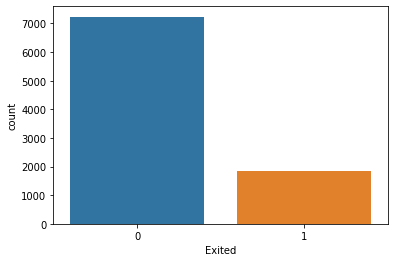

In [20]:
sns.countplot(data['Exited'])
plt.show()

### Conclusion

Our data consists from 14 features, where we found out that RowNumber, CustomerId and Surname are not important (don't impact on the model) features by importance: 'Age','EstimatedSalary','Balance','CreditScore','NumOfProducts', 'Tenure','IsActiveMember','Geography','Gender','HasCrCard'. Our target is 'Exited'. Also we have Balance, EstimatedSalary and good questiong what is meause of those columns(we could infer it from column of Geography, if it's Europe probably it's euro). Also some data was missed at Tenure column, but using some simplistic model (linear regression) we imputed it.

## Feature Scaling

In [21]:
# features that we will standardize
numeric = ['CreditScore','Geography','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender_Male']

# standardizing the training set, the validating set and the testing set
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()


,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
9344,9345,15720050,0.809075,-0.90352,-1.039327,-1.025995,0.554904,-0.908179,0.663468,-1.024127,0.019508,-1.107304
3796,3797,15578096,-1.152518,-0.90352,-1.227561,0.696524,0.480609,-0.908179,-1.507231,-1.024127,0.056167,0.903094
7462,7463,15598266,-0.398853,-0.90352,0.090079,1.385532,-1.237830,-0.908179,0.663468,0.976442,0.848738,0.903094
1508,1509,15701200,-0.749875,-0.90352,-0.286389,0.352020,-1.237830,0.809300,0.663468,0.976442,-0.894953,0.903094
4478,4479,15622443,-1.028628,-0.90352,-0.756975,-0.336987,-1.237830,0.809300,-1.507231,0.976442,-1.284516,0.903094


### Conclusion
The original dataset was split 3:1:1 into sets for training, testing and verification. The features in this dataset have different scales, so we standardize them. We want all the features to be considered equally important before the algorithm is executed.

## Train the model without taking into account the imbalance.

accuracy: 0.8070368334249588
F1: 0.0
AUC-ROC: 0.4906126520567938


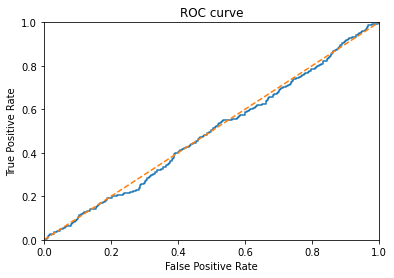

In [22]:
warnings.filterwarnings("ignore")

# training the model with a logistic regression algorithm
model_logistic_reg_im = LogisticRegression(random_state=12345, solver='liblinear') 
model_logistic_reg_im.fit(features_train, target_train)

# make a prediction the training set
predicted_valid_logistic_reg_im = model_logistic_reg_im.predict(features_valid)

# calculate the class probability 
probabilities_valid_logistic_reg_im = model_logistic_reg_im.predict_proba(features_valid)

# calculate the main metrics of the model
print('accuracy:',accuracy_score(target_valid,predicted_valid_logistic_reg_im))
print('F1:', f1_score(target_valid, predicted_valid_logistic_reg_im))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_valid_logistic_reg_im[:, 1]))

# plot the metrics for the FPR, TPR variables and Thresholds values
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid_logistic_reg_im[:, 1])
plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model 
plt.plot([0, 1], [0, 1], linestyle='--')
# set the boundary for the axes from 0 to 1 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# to name the axes "False Positive Rate" and "True Positive Rate"
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# add the heading "ROC curve" 
plt.title('ROC curve')
plt.show()

accuracy: 0.8565145684442002
F1: 0.5280289330922243
AUC-ROC: 0.8225273061785322


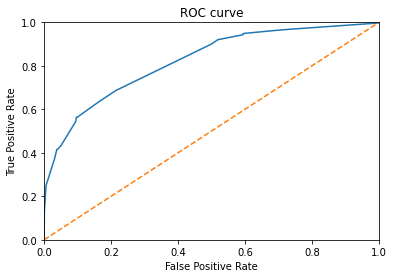

In [23]:
# training the model, make a prediction the training set and calculate the class probability 
model_tree_classifier_im = DecisionTreeClassifier(random_state=12345, max_depth=5)
model_tree_classifier_im.fit(features_train, target_train)
predicted_valid_tree_classifier_im = model_tree_classifier_im.predict(features_valid)
probabilities_valid_tree_classifier_im = model_tree_classifier_im.predict_proba(features_valid)

# calculate the main metrics of the model
print('accuracy:',accuracy_score(target_valid,predicted_valid_tree_classifier_im))
print('F1:', f1_score(target_valid, predicted_valid_tree_classifier_im))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_valid_tree_classifier_im[:, 1]))

# plot the metrics for the FPR, TPR variables and Thresholds values
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid_tree_classifier_im[:, 1])
plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model 
plt.plot([0, 1], [0, 1], linestyle='--')
# set the boundary for the axes from 0 to 1 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# to name the axes "False Positive Rate" and "True Positive Rate"
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# add the heading "ROC curve" 
plt.title('ROC curve')
plt.show()

accuracy: 0.868609125893348
F1: 0.5784832451499118
AUC-ROC: 0.8543175590178316


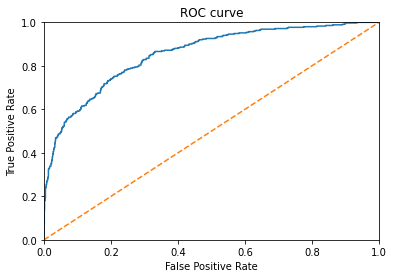

In [24]:
# training the model, make a prediction the training set and calculate the class probability
model_forest_classifier_im = RandomForestClassifier(random_state=12345, n_estimators=35,max_features = 12,
                                                    min_samples_split=5, min_samples_leaf=5, max_depth=10)
model_forest_classifier_im.fit(features_train, target_train)    
predicted_valid_forest_classifier = model_forest_classifier_im.predict(features_valid)
probabilities_valid_forest_classifier_im = model_forest_classifier_im.predict_proba(features_valid)
probabilities_one_valid_forest_classifier_im = probabilities_valid_forest_classifier_im[:, 1]

# calculate the main metrics of the model
print('accuracy:',accuracy_score(target_valid,predicted_valid_forest_classifier))
print('F1:', f1_score(target_valid, predicted_valid_forest_classifier))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid_forest_classifier_im))

# plot the metrics for the FPR, TPR variables and Thresholds values
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_forest_classifier_im)
plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model
plt.plot([0, 1], [0, 1], linestyle='--')
# set the boundary for the axes from 0 to 1 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# to name the axes "False Positive Rate" and "True Positive Rate"
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# add the heading "ROC curve"
plt.title('ROC curve')
plt.show()

### Conclusion
Training the model without taking into account the class imbalance gave the best quality when training with the Random Forest algorithm. Since the F1 score for this model is higher than the others, it means Precision:Recall is closer to 1:1. Also, the AUC-ROC metric is better for the Random Forest algorithm, which means that there are more TPR values. R2 score is also almost equal to 1, which indicates the high quality of the model. The training of the model by the Logistic Regression algorithm completely failed.

## Fixing class imbalance.

In [25]:
# use an algorithm upsampling to duplicate some of the positive observations
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1] 
    target_zeros = target[target == 0]
    target_ones = target[target == 1] 
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [26]:
# use an algorithm downsampling to discard some of the negative observations
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled,target_downsampled,random_state=12345)
    return features_downsampled, target_downsampled

### The Logistic Regression Model

Confusion Matrix for the Logistic Regression Model:
[[1058  410]
 [ 113  238]]
Recall : 0.6780626780626781
Precision : 0.36728395061728397
F1 : 0.4764764764764765
AUC-ROC: 0.7708784554833602


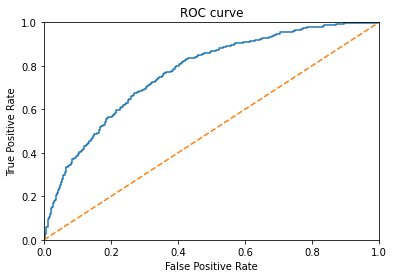

In [27]:
# training the model with a logistic regression algorithm with class weight adjustment 
model_logistic_reg = LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear') 
model_logistic_reg.fit(features_train, target_train)
predicted_valid_logistic_reg = model_logistic_reg.predict(features_valid)
probabilities_one_valid_logistic_reg = model_logistic_reg.predict_proba(features_valid)
probabilities_one_valid_logistic_reg = probabilities_one_valid_logistic_reg[:, 1]

# calculate the main metrics of the model
print('Confusion Matrix for the Logistic Regression Model:')
print(confusion_matrix(target_valid,predicted_valid_logistic_reg))
print('Recall :', recall_score(target_valid,predicted_valid_logistic_reg))
print('Precision :', precision_score(target_valid,predicted_valid_logistic_reg))
print('F1 :', f1_score(target_valid,predicted_valid_logistic_reg))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid_logistic_reg))

# plot the metrics for the FPR, TPR variables and Thresholds values
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_logistic_reg)
plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model
plt.plot([0, 1], [0, 1], linestyle='--')
# set the boundary for the axes from 0 to 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# to name the axes "False Positive Rate" and "True Positive Rate"
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# add the heading "ROC curve"
plt.title('ROC curve')
plt.show()

In [28]:
# model training with the use of upsampling algorithm
features_upsampled, target_upsampled = upsample(features_train, target_train, 16)
model_logistic_reg_upsample = LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear')
model_logistic_reg_upsample.fit(features_upsampled,target_upsampled)
predicted_valid_logistic_reg_upsample = model_logistic_reg_upsample.predict(features_valid)

# make a prediction the training set and calculate the class probability
probabilities_valid_logistic_reg_upsample = model_logistic_reg_upsample.predict_proba(features_valid)
probabilities_one_valid_logistic_reg_upsample = probabilities_valid_logistic_reg_upsample[:, 1]

# calculate the main metrics of the model
print('F1:', f1_score(target_valid, predicted_valid_logistic_reg_upsample))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid_logistic_reg_upsample))

F1: 0.3268085106382979
AUC-ROC: 0.6045300697889254


In [29]:
# model training with the use of downsampling algorithm
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.15)
model_logistic_reg_downsample = LogisticRegression( random_state=12345, class_weight='balanced',solver='liblinear')
model_logistic_reg_downsample.fit(features_downsampled,target_downsampled)

# make a prediction the training set and calculate the class probability
predicted_valid_logistic_reg_downsample = model_logistic_reg_downsample.predict(features_valid)
probabilities_valid_logistic_reg_downsample = model_logistic_reg_downsample.predict_proba(features_valid)
probabilities_one_valid_logistic_reg_downsample = probabilities_valid_logistic_reg_downsample[:, 1]

# calculate the main metrics of the model
print('F1:', f1_score(target_valid, predicted_valid_logistic_reg_downsample))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid_logistic_reg_downsample))

F1: 0.4683794466403162
AUC-ROC: 0.770362219272301


## The Decision Tree Model

Confusion Matrix for the Decision Tree Model:
[[1178  290]
 [ 110  241]]
F1 : 0.5464852607709751
AUC-ROC: 0.8332149483375643


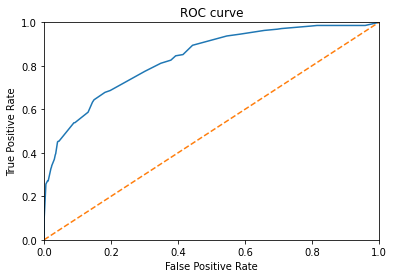

In [30]:
# training the model with the Decision Tree algorithm with class weight adjustment
model_tree_classifier = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=6)
model_tree_classifier.fit(features_train, target_train)

# make a prediction the training set and calculate the class probability
predicted_valid_tree_classifier = model_tree_classifier.predict(features_valid)
probabilities_valid_tree_classifier = model_tree_classifier.predict_proba(features_valid)
probabilities_one_valid_tree_classifier = probabilities_valid_tree_classifier[:, 1]

# calculate the main metrics of the model
print('Confusion Matrix for the Decision Tree Model:')
print(confusion_matrix(target_valid,predicted_valid_tree_classifier))
print('F1 :', f1_score(target_valid,predicted_valid_tree_classifier))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid_tree_classifier))

# plot the metrics for the FPR, TPR variables and Thresholds values
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_tree_classifier)
plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model 
plt.plot([0, 1], [0, 1], linestyle='--')
# set the boundary for the axes from 0 to 1 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# to name the axes "False Positive Rate" and "True Positive Rate"
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# heading "ROC curve" 
plt.title('ROC curve')
plt.show()

In [31]:
# model training with the use of upsampling algorithm
features_upsampled, target_upsampled = upsample(features_train, target_train, 21)
model_tree_classifier_upsample = DecisionTreeClassifier(random_state=12345,class_weight='balanced', max_depth=7)
model_tree_classifier_upsample.fit(features_upsampled,target_upsampled)

# make a prediction the training set and calculate the class probability
predicted_valid_tree_classifier_upsample = model_tree_classifier_upsample.predict(features_valid)
probabilities_valid_tree_classifier_upsample = model_tree_classifier_upsample.predict_proba(features_valid)
probabilities_one_valid_tree_classifier_upsample = probabilities_valid_tree_classifier_upsample[:, 1]

# calculate the main metrics of the model
print('F1:', f1_score(target_valid, predicted_valid_tree_classifier_upsample))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid_tree_classifier_upsample))

F1: 0.5118577075098815
AUC-ROC: 0.8243477180806881


In [32]:
# model training with the use of downsampling algorithm
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)
model_tree_classifier_downsample =  DecisionTreeClassifier(random_state=12345,class_weight='balanced', max_depth=7)
model_tree_classifier_downsample.fit(features_downsampled,target_downsampled)

# make a prediction the training set and calculate the class probability
predicted_valid_tree_classifier_downsample = model_tree_classifier_downsample.predict(features_valid)
probabilities_valid_tree_classifier_downsample = model_tree_classifier_downsample.predict_proba(features_valid)
probabilities_one_valid_tree_classifier_downsample = probabilities_valid_tree_classifier_downsample[:, 1]

# calculate the main metrics of the model
print('F1:', f1_score(target_valid, predicted_valid_tree_classifier_downsample))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid_tree_classifier_downsample))

F1: 0.49552238805970145
AUC-ROC: 0.773166585155686


## The Random Forest Model

In [33]:
# finding the optimal depth of the random forest model
for depth in range(1,10):
    model_tree_classifier = RandomForestClassifier(random_state=12345, max_depth=depth)
    model_tree_classifier.fit(features_train, target_train)
    print('max_depth =',depth, ':',end= '')
    print(model_tree_classifier.score(features_valid,target_valid))
print()

# finding the optimal number of trees in a random forest model
for estimators in range(1,150,10):
    model_forest_classifier = RandomForestClassifier(random_state=12345, n_estimators=estimators)
    model_forest_classifier.fit(features_train, target_train)
    print('n_estimators =',estimators, ':',end= '')
    print(model_forest_classifier.score(features_valid,target_valid))
    

max_depth = 1 :0.8070368334249588
max_depth = 2 :0.817482133040132
max_depth = 3 :0.8273776800439802
max_depth = 4 :0.8427707531610775
max_depth = 5 :0.8548653106102254
max_depth = 6 :0.862561847168774
max_depth = 7 :0.8614623419461243
max_depth = 8 :0.8642111050027488
max_depth = 9 :0.8642111050027488

n_estimators = 1 :0.7724024189114899
n_estimators = 11 :0.8592633315008247
n_estimators = 21 :0.8642111050027488
n_estimators = 31 :0.8647608576140736
n_estimators = 41 :0.8653106102253986
n_estimators = 51 :0.8636613523914238
n_estimators = 61 :0.8664101154480484
n_estimators = 71 :0.8653106102253986
n_estimators = 81 :0.8647608576140736
n_estimators = 91 :0.8664101154480484
n_estimators = 101 :0.8664101154480484
n_estimators = 111 :0.8658603628367235
n_estimators = 121 :0.8658603628367235
n_estimators = 131 :0.8664101154480484
n_estimators = 141 :0.863111599780099


Confusion Matrix for the Random Forest Model:
[[1253  215]
 [ 114  237]]
Recall : 0.6752136752136753
Precision : 0.5243362831858407
F1 : 0.5902864259028642
AUC-ROC: 0.8518343852131317


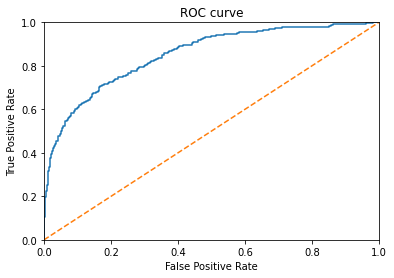

In [34]:
# training the model the Random Forest algorithm with class weight adjustment
model_forest_classifier = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=60, max_depth=8,
                                                 max_features = 12, min_samples_split=5, min_samples_leaf=5)
model_forest_classifier.fit(features_train, target_train)

# make a prediction the training set and calculate the class probability
predicted_valid_forest_classifier = model_forest_classifier.predict(features_valid)
probabilities_valid_forest_classifier = model_forest_classifier.predict_proba(features_valid)
probabilities_one_valid_forest_classifier = probabilities_valid_forest_classifier[:, 1]

# calculate the main metrics of the model
print('Confusion Matrix for the Random Forest Model:')
print(confusion_matrix(target_valid,predicted_valid_forest_classifier))
print('Recall :', recall_score(target_valid,predicted_valid_forest_classifier))
print('Precision :', precision_score(target_valid,predicted_valid_forest_classifier))
print('F1 :', f1_score(target_valid,predicted_valid_forest_classifier))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid_forest_classifier))

# plot the metrics for the FPR, TPR variables and Thresholds values
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_forest_classifier)
plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model 
plt.plot([0, 1], [0, 1], linestyle='--')
# set the boundary for the axes from 0 to 1 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# to name the axes "False Positive Rate" and "True Positive Rate"
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# add the heading "ROC curve"
plt.title('ROC curve')
plt.show()

In [35]:
# model training with the use of upsampling algorithm
features_upsampled, target_upsampled = upsample(features_train, target_train, 21)
model_forest_classifier_upsample = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=60, max_depth=9)
model_forest_classifier_upsample.fit(features_upsampled,target_upsampled)

# make a prediction the training set and calculate the class probability
predicted_valid_forest_classifier_upsample = model_forest_classifier_upsample.predict(features_valid)
probabilities_valid_forest_classifier_upsample = model_forest_classifier_upsample.predict_proba(features_valid)
probabilities_one_valid_forest_classifier_upsample = probabilities_valid_forest_classifier_upsample[:, 1]

# calculate the main metrics of the model
print('F1:', f1_score(target_valid, predicted_valid_forest_classifier_upsample))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid_forest_classifier_upsample))

F1: 0.5938242280285035
AUC-ROC: 0.8601776163084065


In [36]:
# model training with the use of downsampling algorithm
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)
model_forest_classifier_downsample =  RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=60, max_depth=7)
model_forest_classifier_downsample.fit(features_downsampled,target_downsampled)

# make a prediction the training set and calculate the class probability
predicted_valid_forest_classifier_downsample = model_forest_classifier_downsample.predict(features_valid)
probabilities_valid_forest_classifier_downsample = model_forest_classifier_downsample.predict_proba(features_valid)
probabilities_one_valid_forest_classifier_downsample = probabilities_valid_forest_classifier_downsample[:, 1]

# calculate the main metrics of the model
print('F1:', f1_score(target_valid, predicted_valid_forest_classifier_downsample))
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid_forest_classifier_downsample))

F1: 0.5077452667814113
AUC-ROC: 0.8407430696259034


### Conclusion
All supervised learning models, taking into account the imbalance of classes, were trained. Here, too, the best quality was obtained when learning the Random Forest algorithm. In general, I would recommend taking this model, but if we are interested in the maximum number of TPR values, then the best AUC-ROC score was obtained by the Random Forest algorithm with class imbalance correction by upsampling. Since we choose a model based on the best metrics F1 and AUC-ROC, I advise to take a Random Forest algorithm.

##  The final testing.

Accuracy: 0.8476347634763476
F1 : 0.6397919375812745
AUC-ROC: 0.857231476078541


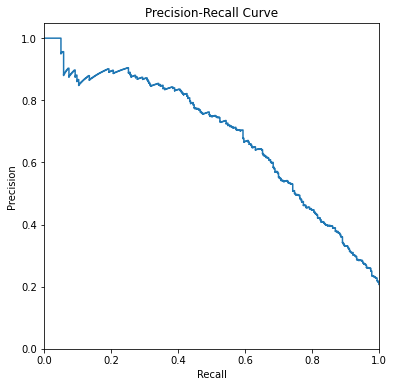

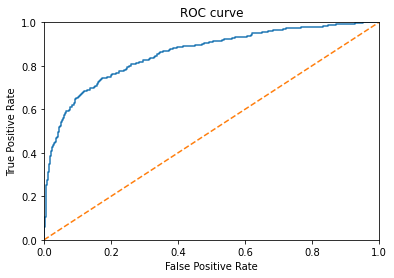

In [37]:
# train model and make a prediction the test set
model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=80, max_depth=10,
                              max_features = 12, min_samples_split=5, min_samples_leaf=5)
model.fit(features_train, target_train)

# make a prediction the training set and calculate the class probability
predictions_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# calculate the main metrics of the model
print('Accuracy:',accuracy_score(target_test,predictions_test))
print('F1 :', f1_score(target_test,predictions_test))
print('AUC-ROC:',roc_auc_score(target_test, probabilities_one_test))

# plot the metrics Precision, Recall, and Thresholds values
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_one_test)
plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')

# plot the metrics for the FPR, TPR variables and Thresholds values
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
# ROC curve for random model 
plt.plot([0, 1], [0, 1], linestyle='--')
# set the boundary for the axes from 0 to 1 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# to name the axes "False Positive Rate" and "True Positive Rate"
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# add the heading "ROC curve"
plt.title('ROC curve')
plt.show() 


### Conclusion
The final testing of the model trained by the Random Forest algorithm, taking into account the imbalance of classes and the parameters of the depth of the tree - 10 and the number of trees - 80 showed F1 score - 0.64 and AUC-ROC - 0.86, which gave us a better result than on the training dataset, so I would recommend using this model to predict the behavior of bank clients.

## General conclusion

Based on the analysis we have come to the following conclusions:
- There are no visible outliers in our data. We decided to keep the data as is and if necessary revisit this section after modeling.
- Most clients are located in France and they are the most loyal to the bank among all countries, on average. The highest churn rate is in Germany. This features might be quite a good predictor for our model.
- Most customers are in their 30s, the distribution is positively skewed as less elder than younger people have bank accounts. - Interestingly that the distribution of "exited" customers (in orange) is closer to normal than that of loyal clients.
- Most clients are male. Female clients leave the bank more often.
- We noticed that our target classes are imbalanced: there are more than twice as many observations when a client stayed with the bank than of those who left. As one way to correct it, we used the stratify parameter while splittig data into train and test sets. It makes a split so that the proportion of values in the sample produced will be the same as the proportion of values in the target variable.

In the next step we have tried to correct imbalanced classes using 3 methods:
1. class weight adjustment;
2. upsampling;
3. downsampling.

We have also tuned each of the 3 chosen algorithms (Decision Tree, Random Forest and Logistic Regression) and searched for the best hyperparameters in order to select the best model.

<b>Random Forest</b> model using Class Weight Adjustment method showed the highest score (62.33). Then we have retrained this model on the whole training set (including validation set) and tested it with the test set that our model didn't see before. We have reached 63.19% F1 score on the test set.

Next, we have checked our model for sanity by comparing the final score to the baseline F1 score. The final F1 score of our model is much higher (28.82%) than the baseline F1 score that we would get if instead of classifying we simply predicted minority class target value for each new observation.

Finally, we have calculated the <b>AUC-ROC</b> value and it turned out to be 86.66%, which means that our model's predictions are correct in more than 80% of cases. We have also plotted the ROC curve. It visualized well the fact that our final model is performing quite well - its ROC curve is much higher than the diagonal.